In [1]:
import pandas as pd
# import plotly.express as px
# import pycountry as pc
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/dataInfo26Mayo.csv')
df2 = pd.read_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/geoEcuModified.csv',encoding ='utf-8')
df3 = pd.read_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/ll.csv',encoding ='utf-8')

In [7]:
fech = df['fecha'].unique()[0]
df1 = df.head(24)
result = pd.merge(df1, df2, how="inner", on='Provincia')
# result

In [10]:
archivo = open('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/geemapgeopandas.csv','a+')
archivo.close
result.to_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/geemapgeopandas.csv',encoding ='utf-8')

<bound method Artist.set_label of <AxesSubplot:title={'center':'Casos Confrimados 26/05/2021'}>>

<ipython-input-80-2c10461b182e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  gdf_Ec1.apply(lambda x: ax.annotate(s=x.Provincia, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


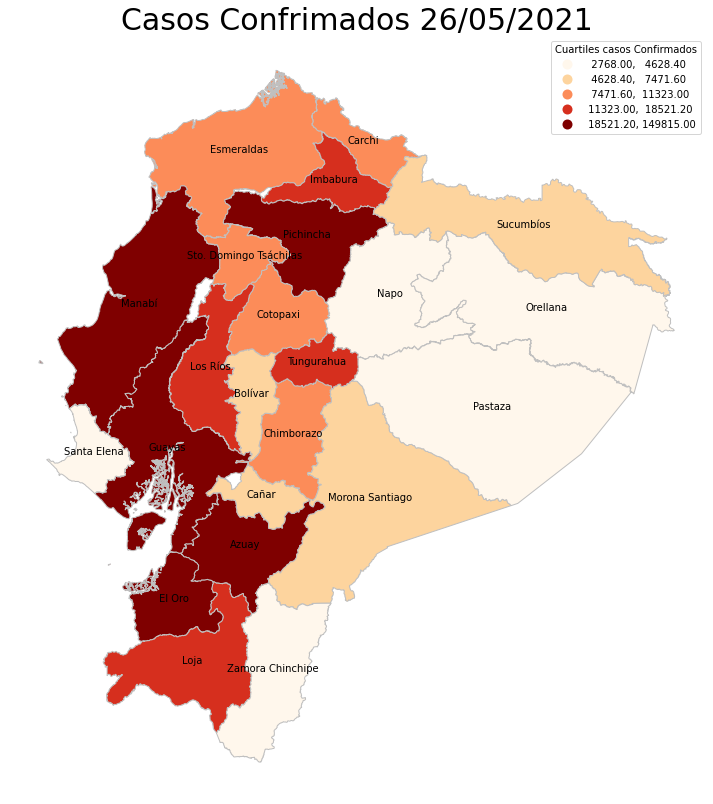

In [80]:
we = gpd.GeoSeries.from_wkt(result['geometry'])

gdf_Ec1 = gpd.GeoDataFrame(df, geometry=we)
gdf_Ec1 =  gdf_Ec1.query('Provincia!= "Galápagos"')
ax = gdf_Ec1.plot(figsize=(14,14),column= 'Confirmados',
                 cmap='OrRd', scheme='quantiles'
                 ,legend = True, edgecolor='silver' 
                 ,legend_kwds= {'title' :'Cuartiles casos Confirmados'}
                )
plt.title("Casos Confrimados {}".format(fech),fontsize = 30,)

ax.set_axis_off();

gdf_Ec1.apply(lambda x: ax.annotate(s=x.Provincia, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
??ax.set_xticks
# plt.xticks(rotation=45 ,fontsize = 18,color='darkslategray')

In [3]:
result2 = pd.merge(result,df3, how='inner', on= 'Provincia')
result2

NameError: name 'result' is not defined

In [26]:
result2.columns

Index(['Nro.Infografía', 'fecha', 'Provincia', 'Confirmados', 'Fallecidos',
       'FallecidosProbables', 'NombreDia', 'geometry', 'Latitud', 'Longuitud'],
      dtype='object')

In [29]:
result2 = result2.rename(columns={'geometry':'Poligonos'})

result2.columns

Index(['Nro.Infografía', 'fecha', 'Provincia', 'Confirmados', 'Fallecidos',
       'FallecidosProbables', 'NombreDia', 'Poligonos', 'Latitud',
       'Longuitud'],
      dtype='object')

In [21]:
import geopandas as gpd

In [30]:
gdf = gpd.GeoDataFrame(result2, geometry = gpd.points_from_xy(result2.Longuitud, result2.Latitud))
gdf

Nro.Infografía       fecha         Provincia  Confirmados  Fallecidos  \
0              454  26/05/2021             Azuay        22751         483   
1              454  26/05/2021            Carchi         7777         265   
2              454  26/05/2021             Cañar         5533         132   
3              454  26/05/2021        Chimborazo         7739         517   
4              454  26/05/2021          Cotopaxi        11008         496   
5              454  26/05/2021            El Oro        20298        1037   
6              454  26/05/2021        Esmeraldas         8268         377   
7              454  26/05/2021         Galápagos         1438          10   
8              454  26/05/2021            Guayas        56494        2568   
9              454  26/05/2021          Imbabura        13515         394   
10             454  26/05/2021              Loja        15856         537   
11             454  26/05/2021            Manabí        30568        2408   
12             454  26/05/2021   Morona Santiago         5608          57   
13             454  26/05/2021              Napo         3169         103   
14             454  26/05/2021          Orellana         3189          83   
15             454  26/05/2021           Pastaza         3160          83   
16             454  26/05/2021         Pichincha       149815        2957   
17             454  26/05/2021       Santa Elena         4292         415   
18             454  26/05/2021         Sucumbíos         5133         169   
19             454  26/05/2021        Tungurahua        13216         468   
20             454  26/05/2021  Zamora Chinchipe         2768          93   

    FallecidosProbables  NombreDia  \
0                    39  Wednesday   
1                     3  Wednesday   
2                    15  Wednesday   
3                   135  Wednesday   
4                   111  Wednesday   
5                   251  Wednesday   
6                    82  Wednesday   
7                    10  Wednesday   
8                  1866  Wednesday   
9                    26  Wednesday   
10                  147  Wednesday   
11                 1174  Wednesday   
12                    7  Wednesday   
13                    4  Wednesday   
14                   22  Wednesday   
15                   19  Wednesday   
16                  364  Wednesday   
17                  281  Wednesday   
18                    7  Wednesday   
19                  334  Wednesday   
20                    7  Wednesday   

                                            Poligonos    Latitud  Longuitud  \
0   POLYGON ((770262.329 9716934.130, 770300.821 9...  -2.900550  -2.900550   
1   POLYGON ((778608.989 10132516.042, 778691.202 ...   0.811870   0.811870   
2   POLYGON ((770262.329 9716934.130, 770204.122 9...  -2.739690  -2.739690   
3   POLYGON ((793990.522 9831634.370, 793990.516 9...  -1.670980  -1.670980   
4   POLYGON ((786958.225 9920678.840, 786958.678 9...  -0.935210  -0.935210   
5   MULTIPOLYGON (((588147.383 9619864.070, 588032...  -3.258610  -3.258610   
6   MULTIPOLYGON (((621920.854 10030817.553, 62192...   0.959200   0.959200   
7   MULTIPOLYGON (((-467804.608 9849555.988, -4677...   0.350000   0.350000   
8   MULTIPOLYGON (((592899.868 9666806.067, 592821...  -2.205840  -2.205840   
9   POLYGON ((854842.039 10039495.144, 854860.584 ...   0.351710   0.351710   
10  POLYGON ((711567.753 9599056.268, 711565.535 9...  -3.993130  -3.993130   
11  MULTIPOLYGON (((518778.727 9813943.938, 518742...  -1.054580  -1.054580   
12  POLYGON ((979219.970 9710663.063, 942193.102 9...  -2.308680  -2.308680   
13  POLYGON ((911388.155 9993366.591, 911392.019 9...  -0.993800  -0.993800   
14  POLYGON ((1139428.272 9927228.340, 1139405.819...  -0.933333  -0.933333   
15  POLYGON ((938555.075 9888295.001, 938550.669 9...  -1.483690  -1.483690   
16  POLYGON ((720732.520 10030123.311, 720725.417 ...  -0.229850  -0.229850   
17  MULTIPOLYGON (((523989.710 9785980.208, 523926

In [35]:
filen = open('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/datageemap.csv',encoding ='utf-8')
filen.close

<function TextIOWrapper.close()>

In [38]:
gdf.drop(['Poligonos'], axis=1).to_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/datageemap.csv',encoding ='utf-8-sig')

## Análisis Univariante


In [2]:
df_final = pd.read_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/dataPdfCovid19.csv')
# df_final.info()

In [3]:
# moda = df['Confirmados'].describe()
moda = df_final['Confirmados'].value_counts()
moda


1272     3
2501     2
3046     2
3780     2
1360     2
        ..
5290     1
3241     1
2170     1
32053    1
4095     1
Name: Confirmados, Length: 391, dtype: int64

In [4]:
cp = df_final.query(' Provincia != "Total general"')
cp
# cp['Confirmados'].describe()

Nro.Infografía       fecha               Provincia  Confirmados  \
0               454  26/05/2021                   Azuay        22751   
1               454  26/05/2021                 Bolívar         6402   
2               454  26/05/2021                  Carchi         7777   
3               454  26/05/2021                   Cañar         5533   
4               454  26/05/2021              Chimborazo         7739   
..              ...         ...                     ...          ...   
403             333  25/01/2021             Santa Elena         2979   
404             333  25/01/2021  Sto. Domingo Tsáchilas         6610   
405             333  25/01/2021               Sucumbíos         3183   
406             333  25/01/2021              Tungurahua         8775   
407             333  25/01/2021        Zamora Chinchipe         1762   

     Fallecidos  FallecidosProbables  NombreDia  
0           483                   39  Wednesday  
1           106                   23  Wednesday  
2           265                    3  Wednesday  
3           132                   15  Wednesday  
4           517                  135  Wednesday  
..          ...                  ...        ...  
403         406                  280     Monday  
404         401                  118     Monday  
405         107                    3     Monday  
406         380                  315     Monday  
407          56                    1     Monday  

[408 rows x 7 columns]

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Confirmados'),
  Text(1.5, 0, 'Fallecidos'),
  Text(2.5, 0, 'FallecidosProbables')])

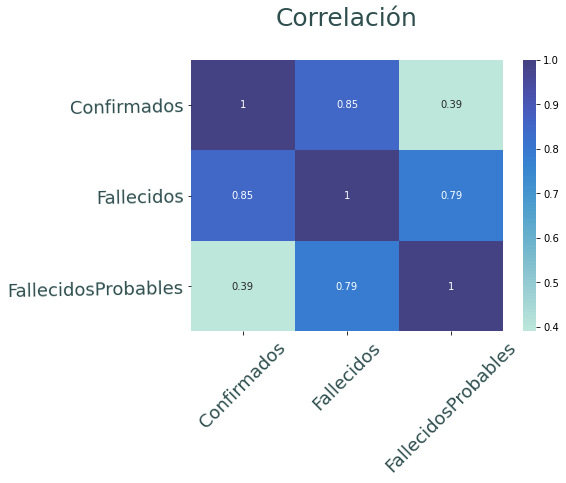

In [41]:
out1 = cp[['fecha','Confirmados','Fallecidos','FallecidosProbables']]
plt.title('Correlación\n' ,fontsize = 25,color='darkslategray')
plt.rcParams['figure.figsize'] = (7.0, 5.0)  # dimensión

sns.heatmap(out1.corr(),center=1.3, annot=True)
plt.yticks(rotation=1,fontsize = 18,color='darkslategray')
plt.xticks(rotation=45 ,fontsize = 18,color='darkslategray')


In [74]:
??plt.ylabel

###  argumestos sns

arplot(x, y, hue, data, order, hue_order, estimator, ci, n_boot, units, seed, orient, color, palette, saturation, errcolor, errwidth, capsize, dodge, ax, **kwargs)

[]

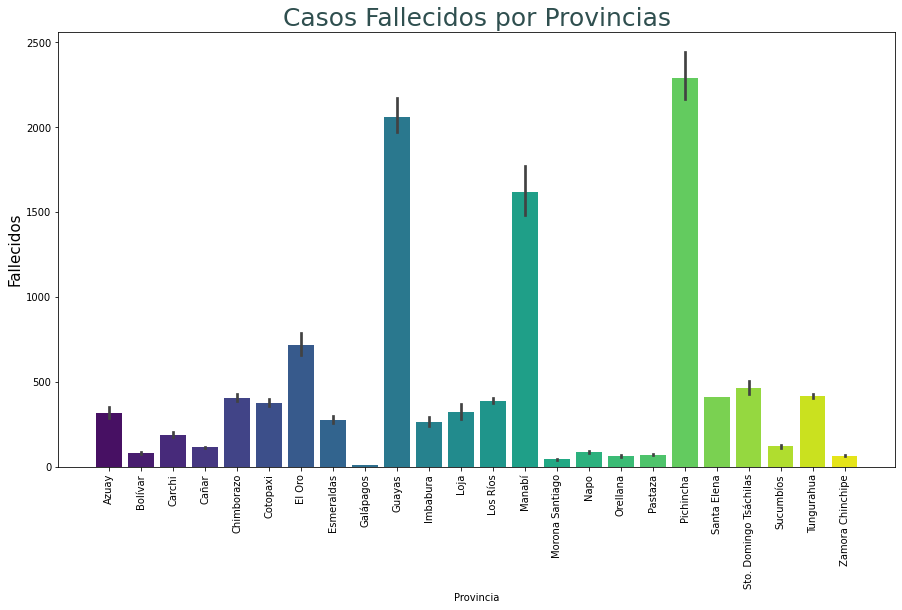

In [76]:
plt.figure(figsize=(15,8))
plt.title('Casos Fallecidos por Provincias',fontsize = 25,color='darkslategray')
plt.ylabel('Fallecidos',fontsize = 15)
plt.xlabel(xlabel= False)
sns.barplot(x=cp['Provincia'], y=cp['Fallecidos'],palette= 'viridis' ,saturation=2.5)
# sns.color_palette("viridis", as_cmap=True)
plt.xticks(rotation=90 ,color = 'black')
plt.plot(column= 'Fallecidos',
         scheme='quantiles',legend = True, edgecolor='silver' ,
         legend_kwds= {'title' :'Cuartiles casos Confirmados'})


c:\users\hugo alvarez t\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Casos Fallecidos\n')

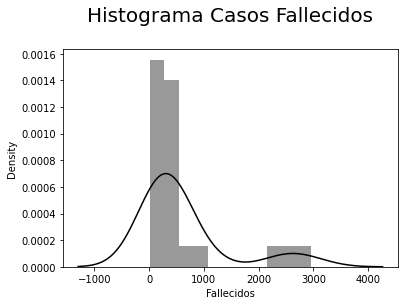

In [49]:
ax = sns.distplot(df['Fallecidos'], color="black")
# ax.set_facecolor('black')
plt.title('Histograma Casos Fallecidos\n',fontsize = 20,color = 'black')

#####  Url : __Tranform Series to GeoSeries__
- https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoDataFrame.html
##### fuente codes
- https://es.wikipedia.org/wiki/ISO_3166-2:EC

In [7]:
r2 = result[['Provincia','Confirmados','Fallecidos']]
r2

Provincia  Confirmados  Fallecidos
0                    Azuay        22751         483
1                  Bolívar         6402         106
2                   Carchi         7777         265
3                    Cañar         5533         132
4               Chimborazo         7739         517
5                 Cotopaxi        11008         496
6                   El Oro        20298        1037
7               Esmeraldas         8268         377
8                Galápagos         1438          10
9                   Guayas        56494        2568
10                Imbabura        13515         394
11                    Loja        15856         537
12                Los Ríos        12107         465
13                  Manabí        30568        2408
14         Morona Santiago         5608          57
15                    Napo         3169         103
16                Orellana         3189          83
17                 Pastaza         3160          83
18               Pichincha       149815        2957
19             Santa Elena         4292         415
20  Sto. Domingo Tsáchilas        11127         643
21               Sucumbíos         5133         169
22              Tungurahua        13216         468
23        Zamora Chinchipe         2768          93

In [9]:
file= open('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/dataGeeMap.csv','a+')
file.close
r2.to_csv('C:/Users/Hugo Alvarez T/Documents/AnalisisDatos/Extraccion/dataGeeMap.csv',encoding ='utf-8-sig',index=False)